# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

My selected data set is the US_Accidents data from the Traffic Accidents project.


### Who - The primary audience for this data story includes:
- **Policy Makers**: Government officials and agencies responsible for transportation and public safety.
- **Urban Planners**: Professionals involved in city planning and infrastructure development.
- **Safety Advocates**: Organizations and individuals advocating for road safety improvements.
- **General Public**: Citizens interested in understanding traffic accident trends and improving personal safety.

### What - The key messages and insights from the US accidents data are:
- **Accident Hotspots**: Identification of locations with high accident frequency and the underlying reasons (e.g., infrastructure issues, traffic volume, weather, etc.).
- **Severity and Impact**: Analysis of accident severity levels and their impact on public health and safety.
- **Time and Weather Factors**: How time of day, day of the week, and weather conditions correlate with accident occurrences and severity.
- **Preventive Measures**: Recommendations for policy changes, infrastructure improvements, and public awareness campaigns to reduce accidents.

### How - The approach to effectively present the data story includes:
- **Visualizations and narratives**: Utilize maps to highlight accident hotspots, bar charts for accident severity distribution, and line graphs to show trends over time. Accompany visualizations with compelling narratives that explain the insights and their implications.
- **Interactive Elements**: Provide interactive dashboards that allow users to explore the data and filter by location, time, and weather conditions.
- **Case Studies**: Include real-world examples and case studies that illustrate the impact of accidents on communities and the effectiveness of preventive measures.
- **Call to Action**: Conclude with clear, actionable recommendations for policy makers, urban planners, safety advocates, and the general public.



# 3. Homework - work with your own data

In [55]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [56]:

# Read the US Accidents CSV file into a DataFrame
US_Accidents_Sampled_50k = pd.read_csv('US_Accidents_March23_sampled_50k.csv')

# Display the first few rows of the DataFrame
print(US_Accidents_Sampled_50k.head())


          ID   Source  Severity       Start_Time         End_Time  Start_Lat  \
0  A-2047758  Source2         2  6/12/2019 10:10  6/12/2019 10:55  30.641211   
1  A-4694324  Source1         2          37:14.0          56:53.0  38.990562   
2  A-5006183  Source1         2          13:00.0          22:45.0  34.661189   
3  A-4237356  Source1         2  2/21/2022 17:43  2/21/2022 19:43  43.680592   
4  A-6690583  Source1         2   12/4/2020 1:46   12/4/2020 4:13  35.395484   

    Start_Lng    End_Lat     End_Lng  Distance(mi)  ... Roundabout Station  \
0  -91.153481        NaN         NaN         0.000  ...      False   False   
1  -77.399070  38.990037  -77.398282         0.056  ...      False   False   
2 -120.492822  34.661189 -120.492442         0.022  ...      False   False   
3  -92.993317  43.680574  -92.972223         1.054  ...      False   False   
4 -118.985176  35.395476 -118.985995         0.046  ...      False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Lo

In [57]:

# Get summary statistics of the DataFrame
print(US_Accidents_Sampled_50k.describe())




           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  49999.000000  49999.000000  49999.000000  27794.000000  27794.000000   
mean       2.210824     36.234409    -94.820680     36.294420    -95.799842   
std        0.484008      5.085757     17.427490      5.252951     18.115825   
min        1.000000     24.566999   -124.482110     24.574546   -124.482110   
25%        2.000000     33.427205   -117.258228     33.517738   -117.790270   
50%        2.000000     35.838230    -87.876785     36.180053    -88.067626   
75%        2.000000     40.118223    -80.366841     40.224297    -80.250416   
max        4.000000     48.924151    -69.648220     48.925935    -69.648220   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  49999.000000    48963.000000   37100.000000  48891.000000   
mean       0.557587       61.579037      58.084795     64.892721   
std        1.777303       19.004778      22.386033     22.888014   
min        0.000

In [58]:
# Get information about the DataFrame
print(US_Accidents_Sampled_50k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49999 non-null  object 
 1   Source                 49999 non-null  object 
 2   Severity               49999 non-null  int64  
 3   Start_Time             49999 non-null  object 
 4   End_Time               49999 non-null  object 
 5   Start_Lat              49999 non-null  float64
 6   Start_Lng              49999 non-null  float64
 7   End_Lat                27794 non-null  float64
 8   End_Lng                27794 non-null  float64
 9   Distance(mi)           49999 non-null  float64
 10  Description            49999 non-null  object 
 11  Street                 49929 non-null  object 
 12  City                   49999 non-null  object 
 13  County                 49999 non-null  object 
 14  State                  49999 non-null  object 
 15  Zi

In [59]:
# Check for duplicate rows
duplicate_rows = US_Accidents_Sampled_50k.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [60]:
# Check for duplicate values in the "ID" column since it's the only column where having duplicate values would be inappropriate
duplicate_ids = US_Accidents_Sampled_50k["ID"].duplicated().sum()

print(f"Number of duplicate values in the 'ID' column: {duplicate_ids}")


Number of duplicate values in the 'ID' column: 0


In [61]:
# Function to calculate the mode
def calculate_mode(df):
    mode = df.mode()
    if len(mode) == 1:
        return mode[0]
    return mode.tolist()  # Return as a list if there are multiple modes

# Calculate summary statistics for each column using describe
summary_stats = US_Accidents_Sampled_50k.describe().transpose()
summary_stats['mode'] = US_Accidents_Sampled_50k.apply(calculate_mode)

# Rename the 50% column to median for consistency
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

print(summary_stats[['mean', 'median', 'mode']])



                        mean     median                               mode
Severity            2.210824   2.000000                                  2
Start_Lat          36.234409  35.838230  [34.055695, 34.858849, 41.800594]
Start_Lng         -94.820680 -87.876785                         -82.260422
End_Lat            36.294420  36.180053                           25.73316
End_Lng           -95.799842 -88.067626                         -80.336612
Distance(mi)        0.557587   0.028000                                0.0
Temperature(F)     61.579037  64.000000                               73.0
Wind_Chill(F)      58.084795  62.000000                               73.0
Humidity(%)        64.892721  67.000000                              100.0
Pressure(in)       29.535696  29.860000                              30.01
Visibility(mi)      9.086627  10.000000                               10.0
Wind_Speed(mph)     7.699655   7.000000                                0.0
Precipitation(in)   0.007

In [62]:
# Check for missing or null values
missing_values = US_Accidents_Sampled_50k.isnull().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])


End_Lat                  22205
End_Lng                  22205
Street                      70
Zipcode                     10
Timezone                    45
Airport_Code               146
Weather_Timestamp          755
Temperature(F)            1036
Wind_Chill(F)            12899
Humidity(%)               1108
Pressure(in)               877
Visibility(mi)            1115
Wind_Direction            1108
Wind_Speed(mph)           3660
Precipitation(in)        14218
Weather_Condition         1104
Sunrise_Sunset             147
Civil_Twilight             147
Nautical_Twilight          147
Astronomical_Twilight      147
dtype: int64


                   Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
Severity           1.000000   0.079748   0.080713  0.079749  0.080722   
Start_Lat          0.079748   1.000000  -0.133379  0.999993 -0.133378   
Start_Lng          0.080713  -0.133379   1.000000 -0.133353  0.999999   
End_Lat            0.079749   0.999993  -0.133353  1.000000 -0.133352   
End_Lng            0.080722  -0.133378   0.999999 -0.133352  1.000000   
Distance(mi)       0.018922   0.079307  -0.000409  0.079804 -0.000402   
Temperature(F)    -0.038658  -0.478900   0.034303 -0.478905  0.034299   
Wind_Chill(F)     -0.040975  -0.483345   0.018650 -0.483353  0.018645   
Humidity(%)        0.039345   0.018440   0.165769  0.018443  0.165762   
Pressure(in)      -0.051946  -0.283834   0.234055 -0.283810  0.234052   
Visibility(mi)    -0.016500  -0.141172   0.013889 -0.141189  0.013881   
Wind_Speed(mph)    0.009831   0.018964   0.101435  0.018983  0.101458   
Precipitation(in)  0.008225  -0.018178   0.043280 -

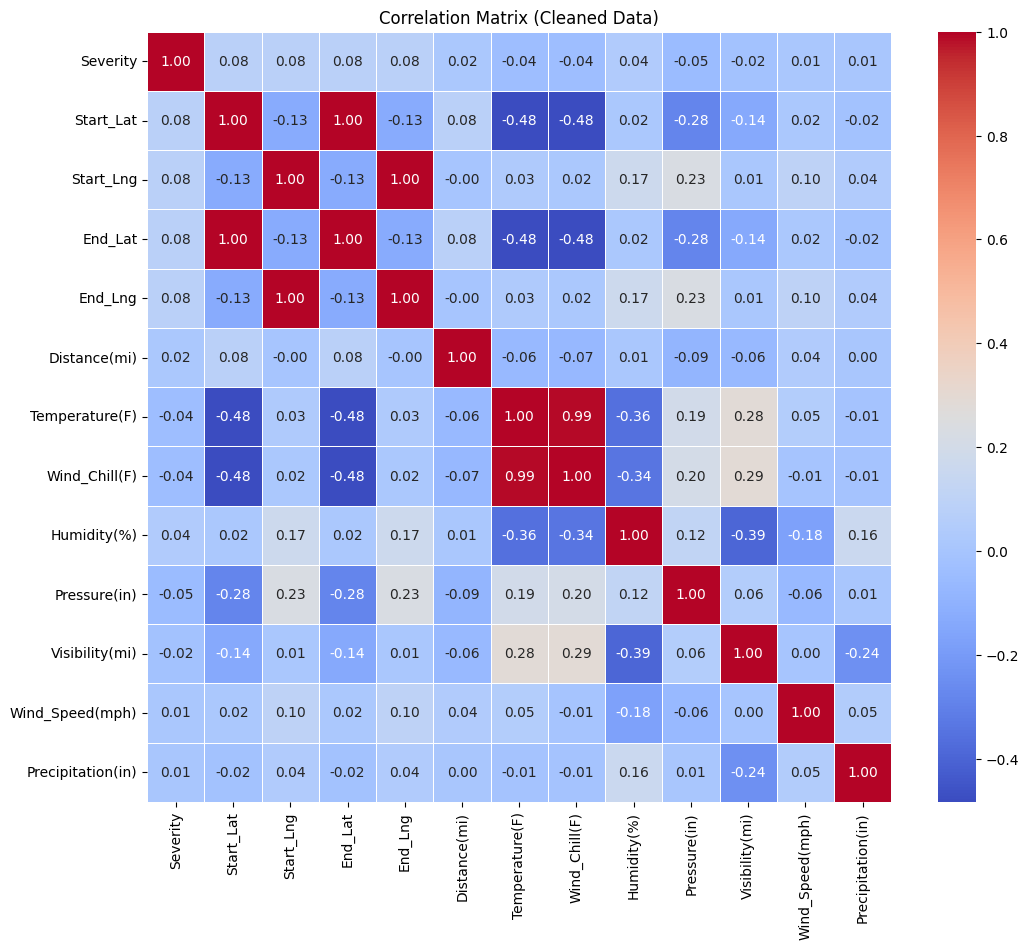

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with any missing values
cleaned_df = US_Accidents_Sampled_50k.dropna()

# Filter the dataset to keep only numeric columns
numeric_df = cleaned_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()



In [64]:
# Since there is a 0.99 correlation between Wind_Chill and Temperature(F), I am using Group-based filling to fill out missing values
US_Accidents_Sampled_50k['Wind_Chill(F)'] = US_Accidents_Sampled_50k.groupby('Weather_Condition')['Wind_Chill(F)'].transform(lambda x: x.fillna(x.mean()))
US_Accidents_Sampled_50k['Temperature(F)'] = US_Accidents_Sampled_50k.groupby('Weather_Condition')['Temperature(F)'].transform(lambda x: x.fillna(x.mean()))


In [65]:
# Since there is a perfect correlation (1) between Start_Lat and End_Lat, I will fill the missing End_Lat values using the corresponding Start_Lat values

US_Accidents_Sampled_50k['End_Lat'] = US_Accidents_Sampled_50k['End_Lat'].fillna(US_Accidents_Sampled_50k['Start_Lat'])



In [66]:
# Since there is a perfect correlation (1) between Start_Lng and End_Lng, I will fill the missing End_Lng values using the corresponding Start_Lng values

US_Accidents_Sampled_50k['End_Lng'] = US_Accidents_Sampled_50k['End_Lng'].fillna(US_Accidents_Sampled_50k['Start_Lng'])

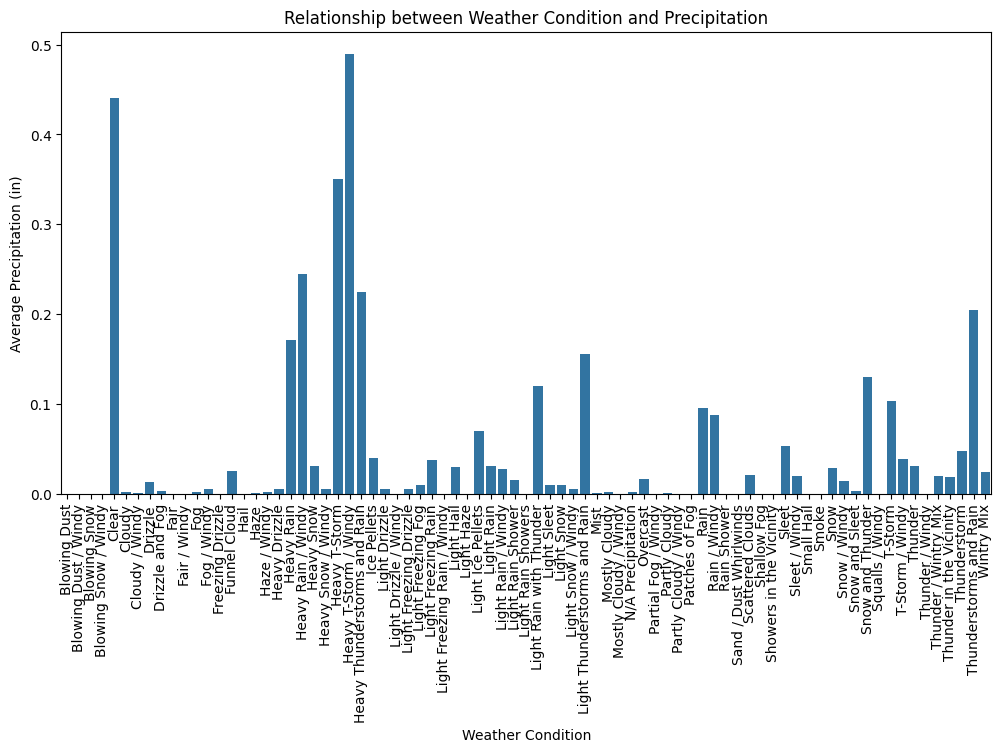

In [67]:

# Filter the dataset to keep relevant columns
weather_data = US_Accidents_Sampled_50k[['Weather_Condition', 'Precipitation(in)']]

# Group the data by weather condition and calculate the average precipitation
weather_precipitation = weather_data.groupby('Weather_Condition')['Precipitation(in)'].mean().reset_index()

# Plot the relationship using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_precipitation, x='Weather_Condition', y='Precipitation(in)')
plt.xticks(rotation=90)
plt.title('Relationship between Weather Condition and Precipitation')
plt.xlabel('Weather Condition')
plt.ylabel('Average Precipitation (in)')
plt.show()


In [68]:
# Based on the graph above, I will fill in the missing values in the Precipitation(in) column using the Weather_Condition column

US_Accidents_Sampled_50k['Precipitation(in)'] = US_Accidents_Sampled_50k.groupby('Weather_Condition')['Precipitation(in)'].transform(lambda x: x.fillna(x.mean()))


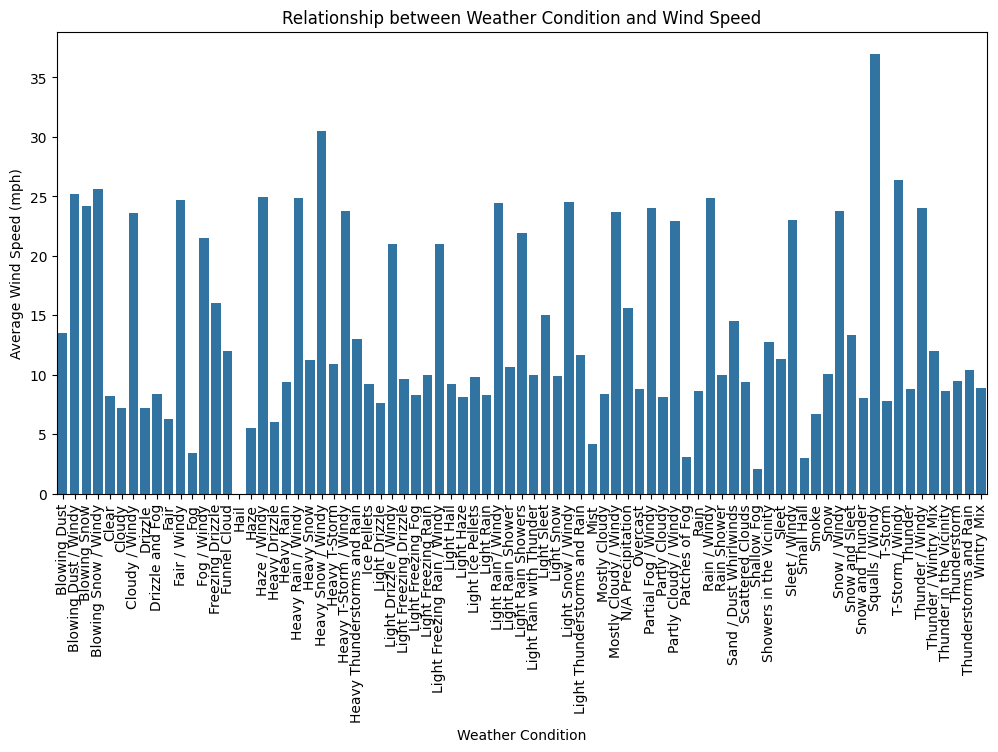

In [69]:

# Filter the dataset to keep relevant columns
weather_data_2 = US_Accidents_Sampled_50k[['Weather_Condition', 'Wind_Speed(mph)']]

# Group the data by weather condition and calculate the average wind speed
weather_wind = weather_data_2.groupby('Weather_Condition')['Wind_Speed(mph)'].mean().reset_index()

# Plot the relationship using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_wind, x='Weather_Condition', y='Wind_Speed(mph)')
plt.xticks(rotation=90)
plt.title('Relationship between Weather Condition and Wind Speed')
plt.xlabel('Weather Condition')
plt.ylabel('Average Wind Speed (mph)')
plt.show()


In [70]:
# Based on the graph above, I will fill in the missing values in the Wind_Speed(mph) column using the Weather_Condition column

US_Accidents_Sampled_50k['Wind_Speed(mph)'] = US_Accidents_Sampled_50k.groupby('Weather_Condition')['Wind_Speed(mph)'].transform(lambda x: x.fillna(x.mean()))


In [71]:
# Check for missing or null values
missing_values = US_Accidents_Sampled_50k.isnull().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])


Street                     70
Zipcode                    10
Timezone                   45
Airport_Code              146
Weather_Timestamp         755
Temperature(F)           1104
Wind_Chill(F)            1155
Humidity(%)              1108
Pressure(in)              877
Visibility(mi)           1115
Wind_Direction           1108
Wind_Speed(mph)          1104
Precipitation(in)        1107
Weather_Condition        1104
Sunrise_Sunset            147
Civil_Twilight            147
Nautical_Twilight         147
Astronomical_Twilight     147
dtype: int64


In [72]:
#Drop all the remaining rows with missing values and create a new copy of the dataset

US_Accidents_NoNull = US_Accidents_Sampled_50k.dropna().copy()

US_Accidents_NoNull.info()



<class 'pandas.core.frame.DataFrame'>
Index: 48031 entries, 0 to 49998
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     48031 non-null  object 
 1   Source                 48031 non-null  object 
 2   Severity               48031 non-null  int64  
 3   Start_Time             48031 non-null  object 
 4   End_Time               48031 non-null  object 
 5   Start_Lat              48031 non-null  float64
 6   Start_Lng              48031 non-null  float64
 7   End_Lat                48031 non-null  float64
 8   End_Lng                48031 non-null  float64
 9   Distance(mi)           48031 non-null  float64
 10  Description            48031 non-null  object 
 11  Street                 48031 non-null  object 
 12  City                   48031 non-null  object 
 13  County                 48031 non-null  object 
 14  State                  48031 non-null  object 
 15  Zipcode

In [73]:
# Addressing other inconsistencies starting with the date and time columns: Start_Time and End_Time. I observed that the standard format is date and time but there is a lot of cells with just time values

# The observed pattern for standard datetime format
pattern = r'\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{2}'

# rows with non-standard datetime formats for Start_Time
non_standard_start = US_Accidents_NoNull[~US_Accidents_NoNull['Start_Time'].str.match(pattern)].index

# rows with non-standard datetime formats for End_Time
non_standard_end = US_Accidents_NoNull[~US_Accidents_NoNull['End_Time'].str.match(pattern)].index


# Combination of indices of non-standard rows
non_standard_indices = non_standard_start.union(non_standard_end)

# Drop the non-standard rows
US_Accidents_NoNull = US_Accidents_NoNull.drop(non_standard_indices)

print(f"Number of rows after dropping non-standard datetime rows: {US_Accidents_NoNull.shape[0]}")




Number of rows after dropping non-standard datetime rows: 43564


In [74]:
#Convert start_time, end_time, and Weather_Timestamp to the right type

# Convert Start_Time and End_Time columns to datetime objects with errors='coerce' to handle invalid formats
US_Accidents_NoNull['Start_Time'] = pd.to_datetime(US_Accidents_NoNull['Start_Time'], errors='coerce')
US_Accidents_NoNull['End_Time'] = pd.to_datetime(US_Accidents_NoNull['End_Time'], errors='coerce')
US_Accidents_NoNull['Weather_Timestamp'] = pd.to_datetime(US_Accidents_NoNull['Weather_Timestamp'], errors='coerce')


In [75]:
US_Accidents_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43564 entries, 0 to 49998
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     43564 non-null  object        
 1   Source                 43564 non-null  object        
 2   Severity               43564 non-null  int64         
 3   Start_Time             43564 non-null  datetime64[ns]
 4   End_Time               43564 non-null  datetime64[ns]
 5   Start_Lat              43564 non-null  float64       
 6   Start_Lng              43564 non-null  float64       
 7   End_Lat                43564 non-null  float64       
 8   End_Lng                43564 non-null  float64       
 9   Distance(mi)           43564 non-null  float64       
 10  Description            43564 non-null  object        
 11  Street                 43564 non-null  object        
 12  City                   43564 non-null  object        
 13  County

In [76]:
# Check unique values in a categorical column
unique_values = US_Accidents_NoNull['Bump'].unique()
print(unique_values)

[False  True]


In [77]:
one_hot = pd.get_dummies(US_Accidents_NoNull["Civil_Twilight"])

US_Accidents_NoNull = US_Accidents_NoNull.join(one_hot)
print("DataFrame after one-hot encoding:")
print(US_Accidents_NoNull.head())

DataFrame after one-hot encoding:
          ID   Source  Severity          Start_Time            End_Time  \
0  A-2047758  Source2         2 2019-06-12 10:10:00 2019-06-12 10:55:00   
3  A-4237356  Source1         2 2022-02-21 17:43:00 2022-02-21 19:43:00   
4  A-6690583  Source1         2 2020-12-04 01:46:00 2020-12-04 04:13:00   
5  A-1101469  Source2         2 2021-03-29 07:03:00 2021-03-29 08:51:00   
6  A-7222249  Source1         2 2020-01-14 16:49:00 2020-01-14 20:49:00   

   Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  ...   Stop  \
0  30.641211  -91.153481  30.641211  -91.153481         0.000  ...  False   
3  43.680592  -92.993317  43.680574  -92.972223         1.054  ...  False   
4  35.395484 -118.985176  35.395476 -118.985995         0.046  ...  False   
5  42.532082  -70.944267  42.532082  -70.944267         0.000  ...  False   
6  42.421280 -123.119450  42.421280 -123.119450         0.000  ...  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunris

**Conclusions**:
- The data is usable but required some cleaning. The sampled dataset was huge with 500k rows. I order to be able to upload this dataset to Github, I had to only use the first 50k columns.
- Some of the columns had missing data. If the column was missing a lot of data (more than 3k rows), I used the correlation matrix to identify how I can refill that column using other columns with high correlation. For columns will less than 3k missing rows, I just deleted them. 
- I had to correct all the datetime columns to ensure that there is consistent formatting and the columns have the right data type. I remove rows that had a non-consistent format and at the end I remained with ~43k rows as opposed to 50k from the start

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

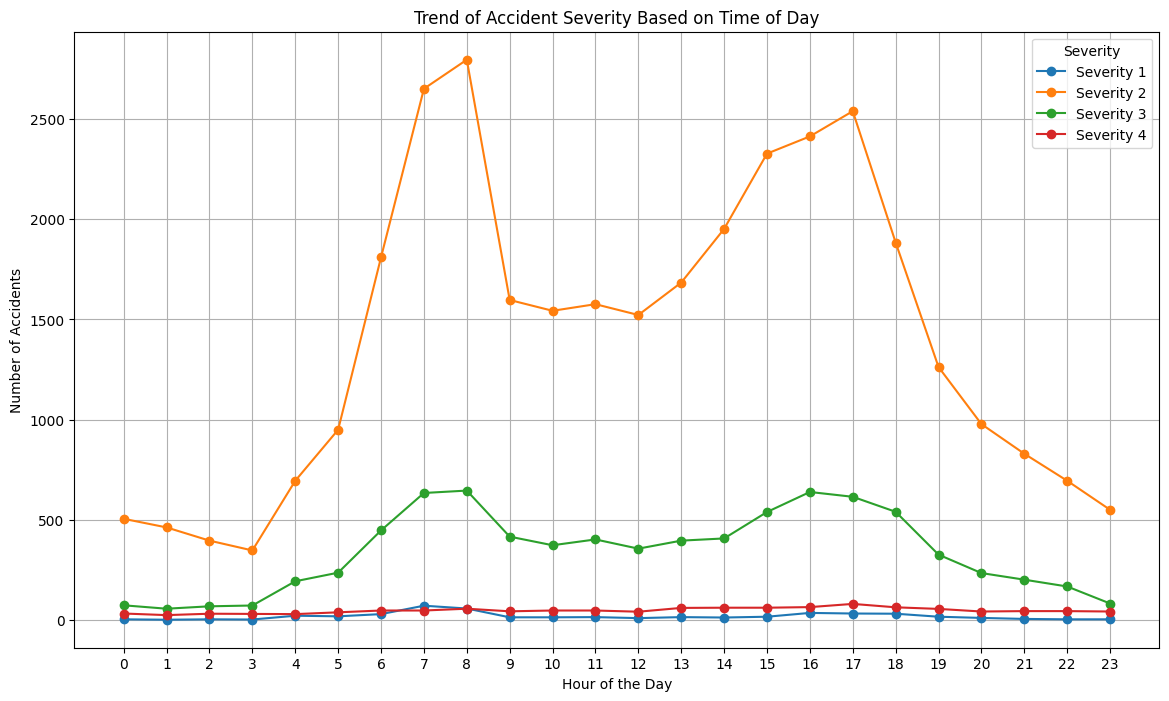

In [78]:
# The line chart below shows the trend of accident severity based on the time of the day. This graph is similar to Figure 03 in the book

# Extract hour from Start_Time
US_Accidents_NoNull['Hour'] = US_Accidents_NoNull['Start_Time'].dt.hour

# Group by Hour and Severity and count the number of accidents
hourly_severity_counts = US_Accidents_NoNull.groupby(['Hour', 'Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))

for severity in hourly_severity_counts.columns:
    plt.plot(hourly_severity_counts.index, hourly_severity_counts[severity], marker='o', label=f'Severity {severity}')

# Add titles and labels
plt.title('Trend of Accident Severity Based on Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Severity')
plt.show()

